In [1]:
#1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#2. Load the dataset

In [10]:
df = pd.read_csv('loan_approval_data.csv')


In [11]:
#2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)
df.sample(5)

loan_id gender married  dependents     education self_employed  \
212  lp001713   male     yes         1.0      graduate           yes   
53   lp001179   male     yes         2.0      graduate            no   
395  lp002272   male     yes         2.0      graduate            no   
594  lp002938   male     yes         0.0      graduate           yes   
527  lp002706   male     yes         1.0  not graduate            no   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
212             7787                0.0       240.0             360.0   
53              4616                0.0       134.0             360.0   
395             3276              484.0       135.0             360.0   
594            16120                0.0       260.0             360.0   
527             5285             1430.0       161.0             360.0   

     credit_history property_area loan_status  
212             1.0         urban           y  
53              1.0         urban           n  
395             NaN     semiurban           y  
594             1.0         urban           y  
527             0.0     semiurban           y

In [12]:
## check the shape 
df.shape

(614, 13)

In [13]:
## check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [14]:
#3.Check for missing values in the dataset, if present?
#handle them with appropriate methods and drop redundant features. (2)
len(df[df.duplicated()])

0

In [15]:
# No duplicate records found

In [16]:
# Drop the columns which you think redundant for the analysis.

df=df.drop(columns=['loan_id'],axis=1)

df.head(5)

gender married  dependents     education self_employed  applicantincome  \
0   male      no         0.0      graduate            no             5849   
1   male     yes         1.0      graduate            no             4583   
2   male     yes         0.0      graduate           yes             3000   
3   male     yes         0.0  not graduate            no             2583   
4   male      no         0.0      graduate            no             6000   

   coapplicantincome  loanamount  loan_amount_term  credit_history  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  property_area loan_status  
0         urban           y  
1         rural           n  
2         urban           y  
3         urban           y  
4         urban           y

In [17]:
#Count of null values
print(df.isnull().sum())

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


In [18]:
#shape of null values 
df[~df.isnull()].shape

(614, 12)

In [19]:
#percentage of null values
df.isna().sum()/df.shape[0]*100

gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

<AxesSubplot:>

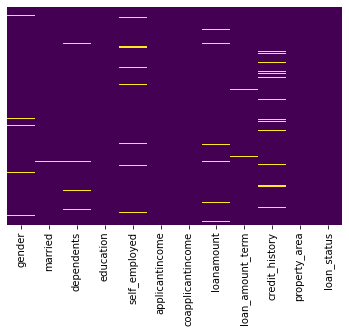

In [20]:
# seaborn heatmap to visualize null values in each column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [21]:
#drop null values
df = df.dropna()
df.isna().sum()
df.shape

(480, 12)

In [22]:
#4.Visualize the distribution of the target column 'loan_status' 
#with respect to various categorical features and write your observations. (2)
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

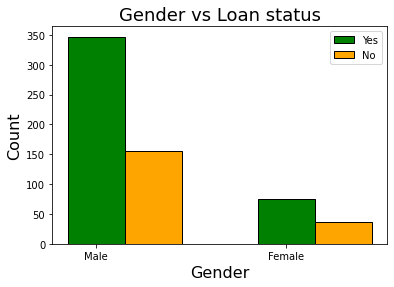

In [23]:
#Relationship between Gender and Loan Status:

Gender = ['Male', 'Female']
Loan_Status = ['Yes', 'No']
pos= np.arange(len(Gender))
bar_width= 0.30
Loan_Status_Yes= [347,75]
Loan_Status_NO= [155,37]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Gender)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Gender vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

In [24]:
#From the chart above, we can conclude that male applicants have higher percentage of loan approval 
# than female applicants and we move more male than female applying for loan

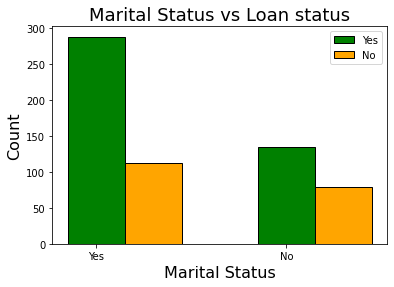

In [25]:
#Relationship between marital status vs loan status

MaritalStatus=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(MaritalStatus))
bar_width=0.30
Loan_Status_Yes=[288,134]
Loan_Status_NO=[113,79]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, MaritalStatus)
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Marital Status vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

In [26]:
# From the chart above, we can conclude that the we have more married thand single customer approved for loan

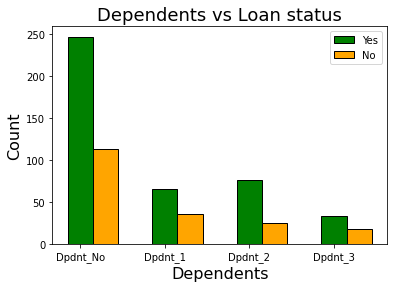

In [27]:
#Relationship between Dependents vs Loan status


Dependents=['Dpdnt_No', 'Dpdnt_1', 'Dpdnt_2', 'Dpdnt_3']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Dependents))
bar_width=0.30
Loan_Status_Yes=[247,66,76,33]
Loan_Status_NO=[113,36,25,18]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Dependents)
plt.xlabel('Dependents', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Dependents vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

In [28]:
# From the chart, we can see that the number of dependents may automatically affects
# the approvals of home loans. There is a higher chance of getting home loan approval for applicants 
# who have less number of dependents or no dependents.

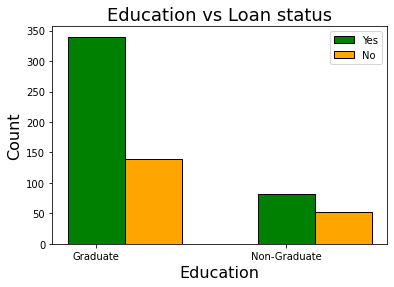

In [29]:
#Relationship between education vs Loan status:


Education=['Graduate', 'Non-Graduate']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Education))
bar_width=0.30
Loan_Status_Yes=[340,82]
Loan_Status_NO=[140,52]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Education)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Education vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

In [30]:
#From the chart above, we can conclude** that the applicants who are graduate were in higher percentage of loan approval than non-graduate applicants.

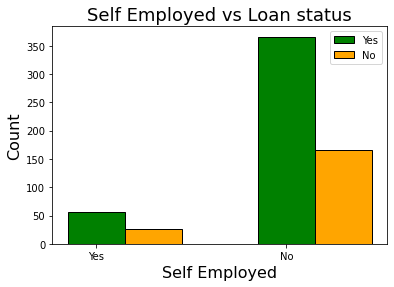

In [31]:
#Relationship between Self-Employed vs Loan_Status:

Self_Employed=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Self_Employed))
bar_width=0.30
Loan_Status_Yes=[56,366]
Loan_Status_NO=[26,166]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Self_Employed)
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Self Employed vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

In [32]:
# From the chart above, we can see that non self employed applicant were more approved for loan 
# that the self employed applicant

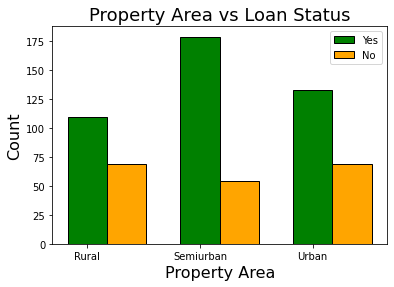

In [33]:
#Relationship between Property area and loan status

Property_Area=['Rural','Semiurban','Urban']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Property_Area))
bar_width=0.35
Loan_Status_Yes=[110,179,133]
Loan_Status_NO=[69,54,69]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Property_Area)
plt.xlabel('Property Area', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Property Area vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

In [34]:
# From the chart above results we can infer that, the higher percentage of loan approval is for semi-urban
# houses followed by urban and rural houses.

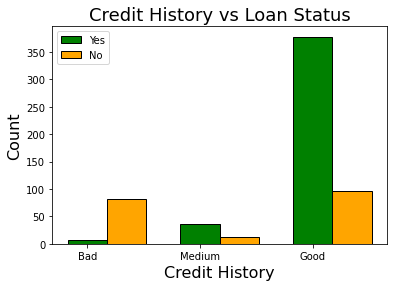

In [35]:
#Relationship between Credit History and Loan Status: 

Credit_History=['Bad','Medium','Good']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Credit_History))
bar_width=0.35
Loan_Status_Yes=[7,37,378]
Loan_Status_NO=[82,13,97]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Credit_History)
plt.xlabel('Credit History', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Credit History vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=2)
plt.show()

In [36]:
# From the chart above results we can infer that, the higher percentage of loan approval is for customers
# with good credit history followed bycustomers with medium credit history and then the bad

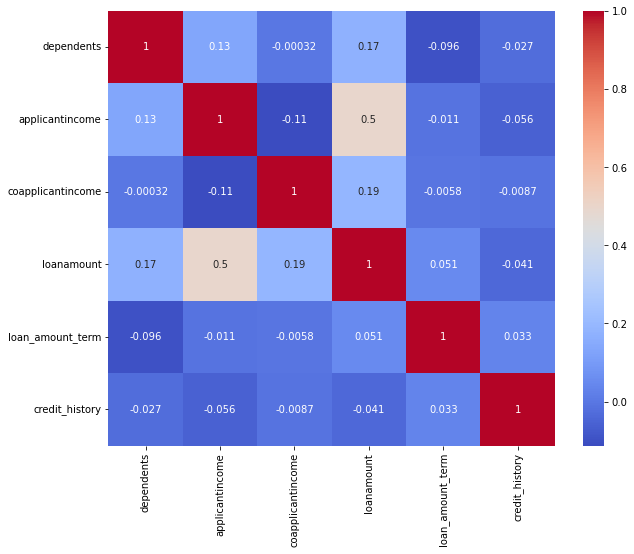

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [38]:
#5. Encode the categorical data. (2)

In [39]:
# print out column with unique values incase if we want to encode our own values
for col in df.columns:
    if df[col].dtypes == 'object':
        num_of_unique_cat = len (df[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

Features 'gender' has '2' unique categories
Features 'married' has '2' unique categories
Features 'education' has '2' unique categories
Features 'self_employed' has '2' unique categories
Features 'property_area' has '3' unique categories
Features 'loan_status' has '2' unique categories


In [130]:
# Encode the categorical data using LabelEncoder, we are not encoding manually
cate=['gender','married','education', 'self_employed','property_area','loan_status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [131]:
# 6.Separate the target and independent features 
#and split the data into train and test. (2)
X = df.drop('loan_status',axis=1)
y = df['loan_status']
df.head(5)

gender  married  dependents  education  self_employed  applicantincome  \
1       1        1         1.0          0              0             4583   
2       1        1         0.0          0              1             3000   
3       1        1         0.0          1              0             2583   
4       1        0         0.0          0              0             6000   
5       1        1         2.0          0              1             5417   

   coapplicantincome  loanamount  loan_amount_term  credit_history  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   property_area  loan_status  
1              0            0  
2              2            1  
3              2            1  
4              2            1  
5              2            1

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(336, 11) (144, 11)
(336,) (144,)


In [133]:
# 7. Build any classification model to predict the loan status of the customer 
# and save your model using pickle. (3)
## Let us build simple random forest classifier model
rf = RandomForestClassifier()
rf.fit(X_train.values,y_train.values)

ypred = rf.predict(X_test.values) #predict on test sample
evaluation = f1_score(y_test, ypred)
evaluation

0.8518518518518519

In [134]:
## Let us check the r2-score to see hows our model is performing
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_train_pred = rf.predict(X_train.values)
y_test_pred = rf.predict(X_test.values)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print('r2-score train:',r2_train)
print('r2-score test',r2_test)


r2-score train: 1.0
r2-score test 0.01009667024704608


In [135]:
# Create a pickle file with an extension as .pkl
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [136]:
# Python Flask Application development (35 points)


In [94]:
# Creating a project and virtual environment using pycharm or visual studio code 
# and installing the required packages (5 points)

#create new folder or directory
mkdir Lab 5 - Web apps using Flask
#change directory to the created folder
cd Lab 5 - Web apps using Flask
#Install python 3.10
brew install python3
#Install virtualenv
pip3 install virtualenv
#create virtual environment envkrish using below command
virtuaenv envkrish
#activate virtual environment
source envkrish/bin/activate
#Set the python version in runtime.txt file 
touch runtime.txt or pip3 install python
#Download all the required libraries for spci
pip freeze > requirements.txt
# or 
pip install -r requirements.txt
#Install gunicorn using Procfile
touch Procfile or pip3 install gunicorn

SyntaxError: invalid syntax (731689335.py, line 5)